<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🏝🛤🔥IMAGE CAPTIONING🔥🖼📷 </div>

![](https://www.microsoft.com/en-us/research/uploads/prod/2017/07/image.caption.copynet-1024x401.jpg)

Certainly! Below is a Markdown template with an example of image captioning, along with preprocessing steps and the training process:

```markdown
# Image Captioning with Deep Learning

Image captioning is the process of generating textual descriptions for images automatically. It combines techniques from computer vision and natural language processing to understand the content of images and describe them in natural language.

## Preprocessing Steps

### Image Preprocessing
1. **Resize Images**: Resize all images to a uniform size to ensure consistency.
2. **Normalize Pixel Values**: Normalize pixel values to a specific range (e.g., [0, 1]) for better convergence during training.
3. **Data Augmentation**: Augment training images with techniques like rotation, flipping, and zooming to increase dataset size and improve model generalization.

### Text Preprocessing
1. **Tokenization**: Tokenize captions into words or subwords to represent them as numerical sequences.
2. **Vocabulary Creation**: Build a vocabulary from the tokenized captions to map words to unique indices.
3. **Padding Sequences**: Pad or truncate caption sequences to a fixed length to ensure uniform input size.

## Training Process

1. **Feature Extraction**: Extract features from images using a pre-trained convolutional neural network (CNN) such as VGG, Inception, or ResNet.
2. **Model Architecture**: Design a model architecture that combines the image features with text inputs for caption generation. Common architectures include encoder-decoder networks with attention mechanisms.
3. **Loss Function**: Define a loss function such as cross-entropy loss to measure the difference between predicted and actual captions.
4. **Training**: Train the model using backpropagation and optimization techniques such as stochastic gradient descent (SGD) or Adam. Monitor metrics such as loss and validation accuracy during training.
5. **Evaluation**: Evaluate the trained model on a separate validation set using metrics like BLEU score to assess caption quality.
6. **Fine-Tuning**: Optionally, fine-tune the model or experiment with hyperparameters to improve performance.

## Example Code Snippet (Python)

```python
# Example code for preprocessing and training an image captioning model

# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, Add

# Define preprocessing steps and model architecture
# (Code for feature extraction, model architecture, and training goes here)
```

This Markdown template provides an overview of image captioning, including preprocessing steps and the training process, along with an example Python code snippet to get you started. You can customize it further based on your specific dataset and requirements.
```

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📜IMPORTING LIBRARIES📜 </div>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Add, Input
from tensorflow.keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, add
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.translate.bleu_score import sentence_bleu
import numpy as np
import concurrent.futures
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import pickle

2024-05-19 22:32:32.267098: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 22:32:32.267203: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 22:32:32.545899: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📂DATASET FOLDER📂 </div>

In [2]:
# Define paths
data_folders = [
    ('/kaggle/input/instagram-images-with-captions/instagram_data', '/kaggle/input/instagram-images-with-captions/instagram_data/captions_csv.csv'),
    ('/kaggle/input/instagram-images-with-captions/instagram_data2', '/kaggle/input/instagram-images-with-captions/instagram_data2/captions_csv2.csv')
]

In [3]:
image_caption_img1 = pd.read_csv("/kaggle/input/instagram-images-with-captions/instagram_data/captions_csv.csv")
image_caption_img2 = pd.read_csv("/kaggle/input/instagram-images-with-captions/instagram_data2/captions_csv2.csv")

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📜SAMPLE OF DATA📜 </div>

In [4]:
image_caption_img1.sample(5).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,Sr No,Image File,Caption
6314,6315,img/insta6315,"My ""I'm so happy to be doing interviews right now"" face"
6941,6942,img/insta6942,Photo Shoot 📷❤
3179,3180,img/insta3180,M🖤🖤D
9597,9598,img/insta9598,I ❤️ my family
5200,5201,img/insta5201,👀 📷thanks


In [5]:
image_caption_img2 = image_caption_img2.set_axis(['Sr No','Image File','Caption'], axis=1)

In [6]:
image_caption_img2.sample(5).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,Sr No,Image File,Caption
806,21323,img2/insta21323,May delete later
7435,27952,img2/insta27952,Taaaaddaaaaa!!!🍾🥂 #Cannes2019 @lorealmakeup @lorealhair @lorealskin
7582,28099,img2/insta28099,Happy Mornings...😊
10543,31060,img2/insta31060,drop ya favorite shade name in the comments! 😜🌶 💜 #MOROCCANSPICEPALETTE @fentybeauty
8288,28805,img2/insta28805,So finally we see each other 😘 senior rockstar ⭐️⭐️ @krunalpandya_official #rockstar


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📜CAPTIONS LOADING📜 </div>

In [7]:
# Update the load_captions function to include file extensions in the paths
def load_captions(data_folders):
    captions_dict = {}
    for img_folder, caption_file in data_folders:
        df = pd.read_csv(caption_file)
        df.columns = df.columns.str.strip()  # Strip any leading/trailing spaces
        print(f"Columns in {caption_file}: {df.columns.tolist()}")  # Debugging line to check column names
        
        if 'Image File' in df.columns and 'Caption' in df.columns:
            for _, row in df.iterrows():
                img_path = os.path.join(img_folder, row['Image File'] + '.jpg')  # Add the file extension (e.g., '.jpg')
                if os.path.exists(img_path):
                    captions_dict[img_path] = row['Caption']
                else:
                    print(f"File not found: {img_path}")
        else:
            df.columns = ['Sr No', 'Image File', 'Caption']
            for _, row in df.iterrows():
                img_path = os.path.join(img_folder, row['Image File'] + '.jpg')  # Add the file extension (e.g., '.jpg')
                if os.path.exists(img_path):
                    captions_dict[img_path] = row['Caption']
                else:
                    pass
                    #print(f"File not found: {img_path}")
                
    return captions_dict

# Load captions with adjusted paths
captions_dict = load_captions(data_folders)

Columns in /kaggle/input/instagram-images-with-captions/instagram_data/captions_csv.csv: ['Sr No', 'Image File', 'Caption']
Columns in /kaggle/input/instagram-images-with-captions/instagram_data2/captions_csv2.csv: ['20516', 'img2/insta20516', 'wHaT dAy Is It Even #stayhomeclub']


In [8]:
print("Sample captions:", list(captions_dict.items())[:5])

Sample captions: [('/kaggle/input/instagram-images-with-captions/instagram_data/img/insta1.jpg', nan), ('/kaggle/input/instagram-images-with-captions/instagram_data/img/insta2.jpg', 'bye '), ('/kaggle/input/instagram-images-with-captions/instagram_data/img/insta3.jpg', 'Ok, a few more... sorry I just had so much fun that day '), ('/kaggle/input/instagram-images-with-captions/instagram_data/img/insta4.jpg', 'This was one of my favorite shoots I’ve ever done! Thank you -a seriously badass woman, for shooting my cover! And thank you to everyone who asked a question for the interview 🤍 '), ('/kaggle/input/instagram-images-with-captions/instagram_data/img/insta5.jpg', 'Wrapped round my finger like a ring ')]


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🛠PREPROCESS DATA🛠 </div>

In [9]:
# Preprocess images
def preprocess_image(img_path, target_size=(299, 299)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize to [0, 1]
    return img

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔍EXTRACT FEATURES🔍 </div>

In [10]:
# Extract features using InceptionV3
def extract_features(img_path, model):
    img = preprocess_image(img_path)
    features = model.predict(img)
    features = np.reshape(features, features.shape[1])
    return features

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📜SAMPLE OF DATA📜 </div>

In [11]:
# Load InceptionV3 model
image_model = InceptionV3(weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-2].output
image_features_extract_model = Model(inputs=new_input, outputs=hidden_layer)

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🏝IMAGE PROCESS🛤 </div>

In [12]:
"""import os
import concurrent.futures
from tqdm import tqdm

# Define a function to extract features for a single image
def process_image(img_path, pbar):
    if os.path.exists(img_path):
        features = extract_features(img_path, image_features_extract_model)
        image_features[img_path] = features
    else:
        print(f"File not found: {img_path}")
    pbar.update(1)  # Update the progress bar

# Process images in parallel using threading
image_features = {}
with tqdm(total=len(captions_dict), desc="Processing images", leave=False) as pbar:
    with concurrent.futures.ThreadPoolExecutor() as executor:
        # Use threading instead of multiprocessing
        futures = [executor.submit(process_image, img_path, pbar) for img_path in captions_dict.keys()]
        for future in concurrent.futures.as_completed(futures):
            pass  # Wait for all threads to complete"""

'import os\nimport concurrent.futures\nfrom tqdm import tqdm\n\n# Define a function to extract features for a single image\ndef process_image(img_path, pbar):\n    if os.path.exists(img_path):\n        features = extract_features(img_path, image_features_extract_model)\n        image_features[img_path] = features\n    else:\n        print(f"File not found: {img_path}")\n    pbar.update(1)  # Update the progress bar\n\n# Process images in parallel using threading\nimage_features = {}\nwith tqdm(total=len(captions_dict), desc="Processing images", leave=False) as pbar:\n    with concurrent.futures.ThreadPoolExecutor() as executor:\n        # Use threading instead of multiprocessing\n        futures = [executor.submit(process_image, img_path, pbar) for img_path in captions_dict.keys()]\n        for future in concurrent.futures.as_completed(futures):\n            pass  # Wait for all threads to complete'

In [13]:
# Save the extracted image features to a file
#output_file = "image_features.pkl"
#with open(output_file, "wb") as f:
#    pickle.dump(image_features, f)

In [14]:
input_file = "/kaggle/input/image-process-pickle/image_features.pkl"
with open(input_file, "rb") as f:
    image_features = pickle.load(f)

#for img_path, features in image_features.items():
#    print(f"Image Path: {img_path}")
#    print("Features:", features)

In [15]:
# Ensure captions_dict only contains paths that have corresponding image features
captions_dict = {k: v for k, v in captions_dict.items() if k in image_features}

In [16]:
# Filter out invalid captions
captions_dict = {k: v for k, v in captions_dict.items() if isinstance(v, str)}

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">✔TOKENIZATION AND PADDING✔</div>

In [17]:
# Extract captions from the dictionary and handle missing values
captions = [caption if isinstance(caption, str) else '' for caption in captions_dict.values()]

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token='<unk>')
tokenizer.fit_on_texts(captions)

# Convert captions to sequences
sequences = tokenizer.texts_to_sequences(captions)

# Pad the sequences
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

print("Tokenizer and sequences prepared successfully.")
print("Sample sequence:", sequences[2])
print("Padded sequence:", padded_sequences[2])
print("Max sequence length:", max_length)

Tokenizer and sequences prepared successfully.
Sample sequence: [11, 35, 46, 12, 3, 147, 1372, 427, 138, 309, 22, 6, 8, 1042, 3426, 482, 10, 611, 3, 124, 7, 22, 6, 4, 132, 67, 1691, 8, 4372, 10, 2, 804, 1981]
Padded sequence: [  11   35   46   12    3  147 1372  427  138  309   22    6    8 1042
 3426  482   10  611    3  124    7   22    6    4  132   67 1691    8
 4372   10    2  804 1981    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🧾DATA GENERATOR🧾 </div>

In [18]:
from keras.utils import to_categorical, Sequence

In [19]:
# Data generator
def data_generator(captions_dict, image_features, tokenizer, max_length, batch_size=32):
    keys = list(captions_dict.keys())
    
    def generator():
        for index in range(0, len(keys), batch_size):
            batch_keys = keys[index:index + batch_size]
            X1, X2, y = [], [], []
            for img_path in batch_keys:
                feature = image_features[img_path]
                caption = captions_dict[img_path]
                seq = tokenizer.texts_to_sequences([caption])[0]
                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # Ensure that X1 and X2 are tuples
                    X1.append(feature)
                    X2.append(in_seq)
                    # Append out_seq directly to y
                    y.append(out_seq)
            yield ((np.array(X1), np.array(X2)), np.array(y))

    return generator

In [20]:
# Get the vocabulary size from the tokenizer
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 for the <unk> token

In [21]:
print("Vocal_size is: ",vocab_size)

Vocal_size is:  27748


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔥MODEL-1 (ENCODER-DECODER)🔥 </div>

In [22]:
# Model
image_input = Input(shape=(2048,))
image_dense1 = Dense(512, activation='relu')(image_input)
image_dense2 = Dense(256, activation='relu')(image_dense1)  
image_dense3 = Dense(256, activation='relu')(image_dense2)
image_dense4 = Dense(256, activation='relu')(image_dense3)

caption_input = Input(shape=(max_length,))
embedding = Embedding(input_dim=vocab_size, output_dim=256)(caption_input)
lstm = LSTM(256)(embedding)

# Concatenate or add more dense layers for the image features and LSTM output
merged = Add()([image_dense4, lstm])
decoder_output = Dense(vocab_size, activation='softmax')(merged)

model = Model(inputs=[image_input, caption_input], outputs=decoder_output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

print("Model created successfully.")

Model created successfully.


In [23]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 512)       │  1,049,088 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │    131,328 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 404)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │     65,792 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 404, 256)  │  7,103,488 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │     65,792 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 256)       │    525,312 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256)       │          0 │ dense_3[0][0],    │
│                     │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 27748)     │  7,131,236 │ add[0][0]         │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,072,036 (61.31 MB)

 Trainable params: 16,072,036 (61.31 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Create the dataset
train_dataset = tf.data.Dataset.from_generator(
    data_generator(captions_dict, image_features, tokenizer, max_length),
    output_signature=(
        (
            tf.TensorSpec(shape=(None, 2048), dtype=tf.float32),
            tf.TensorSpec(shape=(None, max_length), dtype=tf.int32)
        ),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
)

In [25]:
#from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, Callback

# Learning Rate Scheduler
#def lr_scheduler(epoch, lr):
#    if epoch < 5:
#        return lr
#    else:
#        return lr * tf.math.exp(-0.1)

# Custom Callback to Store Training Values
#class TrainingHistory(Callback):
#    def __init__(self):
#        self.history = {'loss': [], 'accuracy': [], 'precision': [], 'recall': []}
    
#    def on_epoch_end(self, epoch, logs=None):
#        for key, value in logs.items():
#            if key in self.history:
#                self.history[key].append(value)

# Define callbacks
#lr_scheduler_callback = LearningRateScheduler(lr_scheduler)
#early_stopping_callback = EarlyStopping(patience=3, restore_best_weights=True)
#training_history_callback = TrainingHistory()

In [26]:
# Verify data shapes
for features, captions in train_dataset.take(1):
    print("Features shape:", features[0].shape)
    print("Captions shape:", captions.shape)

Features shape: (565, 2048)
Captions shape: (565,)


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🧬MODEL-1 TRAINING🧬 </div>

In [27]:
history = model.fit(train_dataset, epochs=50, verbose=1)

Epoch 1/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 121s 118ms/step - loss: 6.6530
Epoch 2/50


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


985/985 ━━━━━━━━━━━━━━━━━━━━ 121s 122ms/step - loss: 5.6553
Epoch 3/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 122s 124ms/step - loss: 5.3772
Epoch 4/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 123s 124ms/step - loss: 5.1774
Epoch 5/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 123s 124ms/step - loss: 5.0167
Epoch 6/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 123s 124ms/step - loss: 4.8910
Epoch 7/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 123s 124ms/step - loss: 4.7466
Epoch 8/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 123s 124ms/step - loss: 4.6954
Epoch 9/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 123s 125ms/step - loss: 4.5845
Epoch 10/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 123s 125ms/step - loss: 4.4946
Epoch 11/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 123s 125ms/step - loss: 4.4498
Epoch 12/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 123s 125ms/step - loss: 4.3326
Epoch 13/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 123s 125ms/step - loss: 4.2279
Epoch 14/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 123s 125ms/step - loss: 4.1344
Epoch 15/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 123s 125ms/step - loss: 4.0590
Epoch 16/50

In [28]:
# Save the model
model.save("/kaggle/working/image-captioning.h5")

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔍MODEL EVALUATION🔍</div>

In [29]:
image_dir = '/kaggle/input/instagram-images-with-captions/instagram_data/img'

# Retrieve image paths from the directory
image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]

In [30]:
captions = [
    "nan",
    "bye",
    "Ok, a few more... sorry I just had so much fun that day",
    "This was one of my favorite shoots I’ve ever done! Thank you -a seriously badass woman, for shooting my cover! And thank you to everyone who asked a question for the interview 🤍",
    "Wrapped round my finger like a ring"
]

In [31]:
import random
import pandas as pd
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Define the number of samples you want to take
num_samples = 10

# Take a sample of 10 random elements from the dataset
sample_dataset = train_dataset.shuffle(buffer_size=1000).take(num_samples)

# Create lists to store predictions and actual captions
predictions = []
actual_captions = []

# Iterate over the sample_dataset and make predictions
for batch in sample_dataset:
    image_features, input_sequence = batch[0]
    prediction = model.predict([image_features, input_sequence])
    predictions.append(prediction)

    # Get the actual caption
    actual_caption_sequence = batch[1].numpy().squeeze().tolist()
    actual_caption = tokenizer.sequences_to_texts([actual_caption_sequence])[0]
    actual_captions.append(actual_caption)

# Calculate BLEU score for each prediction
bleu_scores = []
predicted_captions = []
smoothie = SmoothingFunction().method4

for prediction, actual_caption in zip(predictions, actual_captions):
    # Check the dimensions of the prediction and apply argmax accordingly
    if prediction.ndim == 3:
        predicted_indices = prediction.argmax(axis=2).squeeze().tolist()
    elif prediction.ndim == 2:
        predicted_indices = prediction.argmax(axis=1).tolist()
    else:
        raise ValueError("Unexpected prediction shape: {}".format(prediction.shape))
    
    # Convert predicted caption to text
    predicted_caption = tokenizer.sequences_to_texts([predicted_indices])[0]
    predicted_captions.append(predicted_caption)
    
    # Calculate BLEU score with smoothing
    bleu_score = sentence_bleu([actual_caption.split()], predicted_caption.split(), smoothing_function=smoothie)
    bleu_scores.append(bleu_score)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">PREDICTION DATAFRAME WITH BLUE-SCORE</div>

In [32]:
results_df = pd.DataFrame({
    'Actual Caption': actual_captions,
    'Predicted Caption': predicted_captions,
    'BLEU Score': bleu_scores
})

results_df.style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,Actual Caption,Predicted Caption,BLEU Score
0,duran shoot 2009 duran shoot 2009 duran shoot 2009 last night look what sent north thank you for these little custom jackets to match mommy be the hottest mom in the entire world birthday to my best friend in the entire world after becoming a mom myself i understand you in a way i didn't think was possible i respect so much how you are able to raise 6 children have a career and give each of us so much attention and be our biggest and love us so you are my idol my and i love you forever voted have you last night morning walk 🐴 💚 the sweetest girl in the world happy birthday i love you so much on the inside lol at lacma art film gala wearing a et dress tom ford heels cartier necklace grace anna little is waiting to show daddy her costume halloween has started early this morning is on the loose meow 2010 2012 halloween 2012 look wolford top i cut to crop it wolford dress i'm wearing as a skirt margiela dress i'm wearing open as a jacket prada heels i bought on ebay hermes purse saint laurent sunglasses lunch of our shoot by hair kevin ryan make up mario styled by 2014 launches today at lipsy really obsessed with waist training thank you for my new waist birthday bruce you are officially a senior lol thank you for teaching me so much about life i love you so much xoxo at code mobile conference in san fran with,sista shoot 😘 sista shoot 😘 sista shoot 😘 last night my last i me thank you so this shoes dresses and match my like mom ever the b ciarrap my homie friend in the world he a like and love and this smile love want it a to love their much and can’t to you have a career and give it other others as i thank and miss better and you as my and love you been to you last night morning the ride throne i the world birthday love u ❤️❤️ much through the ball on my vintage nikecourt and dry heels striveforgreatness life boo who bff tiny got back to describe o d my sisters arrived mountains way morning not way meow 2010 or kicks stella kicks miss my the it with and too my a promise dress for a few prada single don't promise them this hermes purse oh laurent sweater today's video stella up hair by time today in 3pm not getting 😍😍 this training on you getting lil video b ciarrap have officially on i you all all me so much love your hold love you much at the today a fran,0.067063
1,to bill and the whole team on the goldenglobes www com news lebron james striveforgreatness uninterrupted and ambition of big rings theland striveforgreatness do what u want when u poppin on striveforgreatness man deserves a queen mrs savannahrj friday the 13th night beautiful evening to be home relaxing last night from the tribe last night love this time of year treats coming friday the 13th king x striveforgreatness with his b the sneaky and proud of this from http news nike com news lemon lebron james striveforgreatness show me you've created striveforgreatness it done straight up realtristan13 future is now s o the homies future yes sir lil mama like football just like blessed that's all man striveforgreatness and i are up striveforgreatness blessed anniversary my queen mrs savannahrj a couple but not forgotten we on a mission theland striveforgreatness is served it's over for you two lol wit my morning yoga session today with we x lebron crazy striveforgreatness to go boys keep them up striveforgreatness men mavcarter ernieramos rometrav realtristan13 b klutch striveforgreatness up beatsbydre g day my brother pr again all love zero rwtw wit my ernieramos,to venuswilliams bill and and the whole of the goldenglobes bit com striveforgreatness lebron james striveforgreatness striveforgreatness striveforgreatness striveforgreatness uninterrupted and ambition of best rings theland striveforgreatness know it u have my my poppin time deserves a queen mrs savannahrj b the 13th day at and gorgeous me home relaxing last night itsjustdifferent the tribe last night itsjustdifferent wear these kid right me treats coming friday th

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📈BLUE-SCORE GRAPH📉</div>

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns 

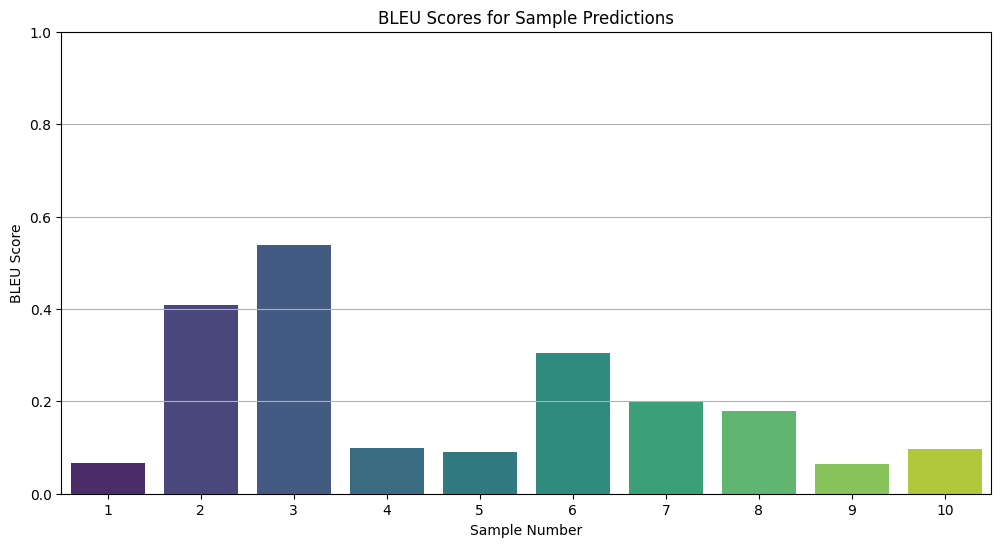

In [34]:
results_df['BLEU Score'] = results_df['BLEU Score'].astype(float)

# Plot the BLEU scores using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index + 1, y=results_df['BLEU Score'], palette="viridis")
plt.xlabel('Sample Number')
plt.ylabel('BLEU Score')
plt.title('BLEU Scores for Sample Predictions')
plt.ylim(0, 1)  # BLEU score range is from 0 to 1
plt.grid(axis='y')

# Display the plot
plt.show()

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> ✨MODEL PREDICTION✨</div>

In [35]:
import random

# Define the number of samples you want to take
num_samples = 10

# Take a sample of 10 random elements from the dataset
sample_dataset = train_dataset.shuffle(buffer_size=num_samples).take(num_samples)

# Create a list to store predictions
predictions = []

# Iterate over the sample_dataset and make predictions
for batch in sample_dataset:
    image_features, input_sequence = batch[0]
    prediction = model.predict([image_features, input_sequence])
    predictions.append(prediction)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [36]:
predictions[0]

array([[8.6699897e-10, 9.1195337e-02, 2.4315465e-04, ..., 8.4018159e-10,
        8.2167106e-10, 9.0082641e-10],
       [4.4096088e-10, 9.2022307e-02, 2.8449290e-03, ..., 4.2059206e-10,
        3.9100143e-10, 4.6547929e-10],
       [2.3265188e-12, 4.9124603e-05, 2.3858547e-05, ..., 2.2454543e-12,
        2.2326338e-12, 2.6413845e-12],
       ...,
       [3.3746551e-11, 9.3049601e-02, 1.8812522e-02, ..., 3.0577207e-11,
        3.2914425e-11, 3.4836183e-11],
       [9.3003255e-10, 5.4546243e-01, 9.7186426e-03, ..., 9.5691943e-10,
        9.2561014e-10, 8.9760105e-10],
       [2.8906776e-11, 5.1549438e-02, 7.1788486e-04, ..., 2.9716257e-11,
        3.0019098e-11, 2.7895193e-11]], dtype=float32)

In [37]:
# Convert predictions to captions
captions = []
for prediction in predictions:
    caption = []
    for word_index in np.argmax(prediction, axis=1):
        word = tokenizer.index_word[word_index]
        caption.append(word)
    captions.append(caption)

In [38]:
print("[", end="")
for word in captions[0]:
    print(f"'{word}'", end=", ")
print("]")

['is', 'and', 'you', '<unk>', 'this', 'love', 'article', '<unk>', '<unk>', '<unk>', 'best', 'in', 'the', 'gold', 'honestly', 'knowing', 'the', 'man', 'has', 'the', 'years', 'learning', 'and', 'growing', 'so', 'you', '<unk>', 'love', '<unk>', 'to', 'be', 'apart', 'of', 'my', 'you', 'do', 'to', 'inspire', 'the', 'world', 'come', '<unk>', 'going', 'next', 'generation', 'by', 'grace', 'through', 'faith', '<unk>', 'that', 'know', 'you', 'being', '<unk>', '<unk>', 'your', 'world', '<unk>', 'home', '<unk>', 'tour', '<unk>', 'my', 'you', '<unk>', 'guys', 'were', 'i', 'you', 'so', 'this', 'being', 'matter', 'most', 'us', 'night', 'on', 'his', 'for', 'an', 'ready', 'i'm', 'kick', 'off', 'is', 'now', 'vegas', 'this', 'morning', 'just', 'up', 'on', 'come', '<unk>', 'of', 'wore', 'lead', '<unk>', 'party', 'am', 'to', 'perform', 'in', '<unk>', '<unk>', '<unk>', 'out', 'love', 'wrote', 'tomorrow', 'grateful', 'for', 'this', 'grace', 'and', '<unk>', 'i', 'the', 'great', 'small', 'house', 'love', 'tx',

![](https://static.fontget.com/t/h/thank-you/preview@2x.png)